In [1]:
# Student Information:
# Name Muhammad Owais Imran
# CWID: 20025554
# HW # 06
# HW Title: Decision Tree (C5.0) and Random Forrest

## **Library import**

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## **Loading CSV File**

In [3]:
df = pd.read_csv("./MuhammadOwais_Imran_HW06_RF_C50.csv")
print(df.shape)
df.replace("?",np.nan,inplace=True)
# print(df.shape)

(699, 11)


## **Extracting Class Column and dropping it from data frame**

In [4]:
target = df["Class"]
df.drop(columns=["Class", "Sample"], inplace=True)
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


## **Dividing the data into train (70%) and test (30%) split**

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df, target, test_size=0.3, random_state=4, shuffle=True

)

## **Initializing & Predicting Results C5.0 Decision Classifier**

In [6]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,splitter='best',max_leaf_nodes=5)
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
print(f"Model Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(Y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(Y_test, Y_pred)}\n")

Model Accuracy: 0.919047619047619
Confusion Matrix:
 [[127  11]
 [  6  66]]

Classification Report:
               precision    recall  f1-score   support

           2       0.95      0.92      0.94       138
           4       0.86      0.92      0.89        72

    accuracy                           0.92       210
   macro avg       0.91      0.92      0.91       210
weighted avg       0.92      0.92      0.92       210




## **Tree Visualization**

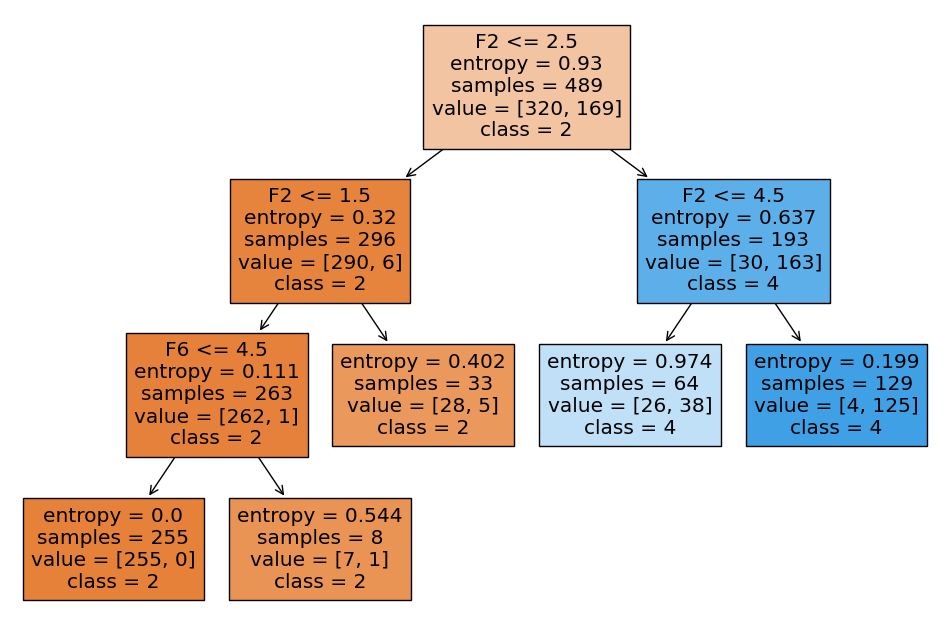

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=df.columns.to_list(), class_names=["2", "4"])
plt.show()

## **Initializing & Predicting Random Forrest Classifier**

In [8]:
df = pd.read_csv("./MuhammadOwais_Imran_HW06_RF_C50.csv")
print(df.shape)
df.replace("?",np.nan,inplace=True)
df.dropna(inplace=True)
target = df["Class"]
df.drop(columns=["Class", "Sample"], inplace=True)
X_train, X_test, Y_train, Y_test = train_test_split(
    df, target, test_size=0.3, random_state=4, shuffle=True

)

tree = RandomForestClassifier(n_estimators=100,random_state=8)
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
print(f"Model Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(Y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(Y_test, Y_pred)}\n")

(699, 11)
Model Accuracy: 0.9512195121951219
Confusion Matrix:
 [[124   8]
 [  2  71]]

Classification Report:
               precision    recall  f1-score   support

           2       0.98      0.94      0.96       132
           4       0.90      0.97      0.93        73

    accuracy                           0.95       205
   macro avg       0.94      0.96      0.95       205
weighted avg       0.95      0.95      0.95       205




## **Feature Importance**

Mean Decrease Accuracy[0.03005216 0.29184424 0.21588713 0.01769427 0.11805437 0.11568811
 0.0629627  0.13978882 0.0080282 ]

Mean Decrease GINI= [0.01255097 0.12188575 0.09016305 0.00738983 0.0493042  0.04831595
 0.02629572 0.05838137 0.0033529 ]


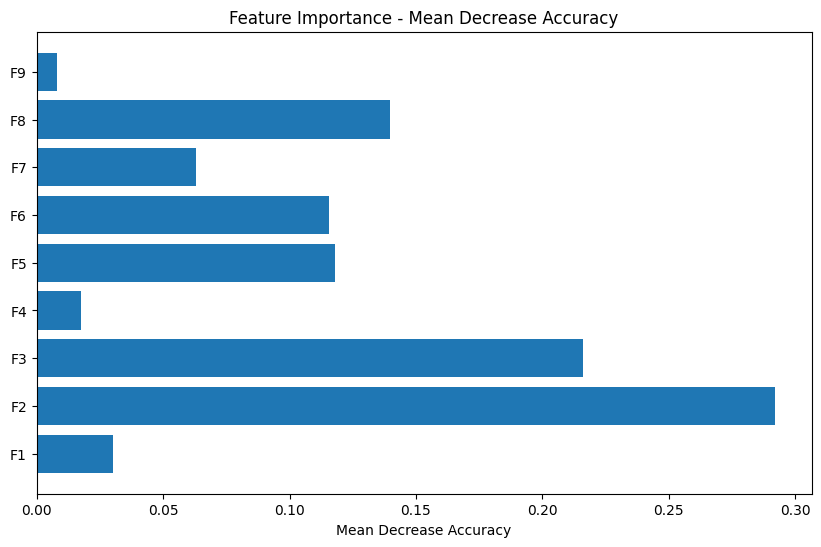

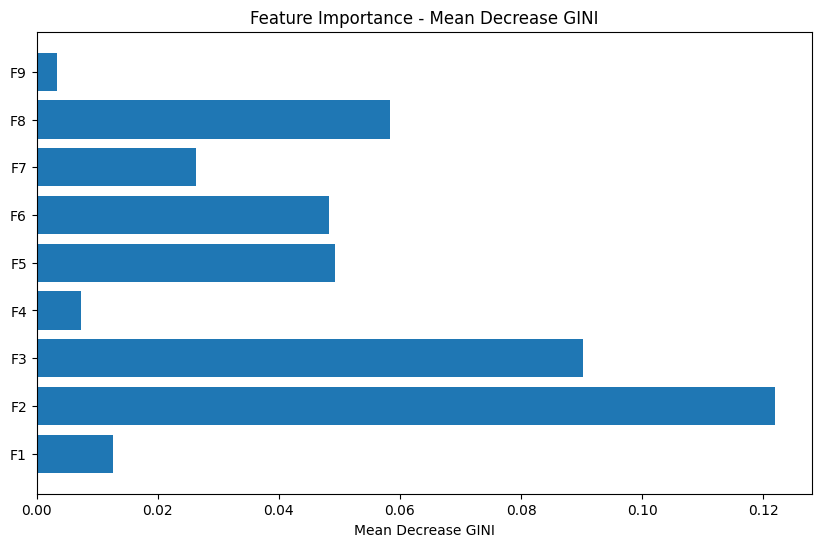

In [9]:

# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = tree.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = tree.feature_importances_ * tree.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), df.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), df.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()
 